In [0]:
!wget https://www.dropbox.com/sh/r5h3zggmsr3w1mu/AAAtTmwhL5OhbB8Wixrqhu-za?dl=0

In [0]:
!ls

'AAAtTmwhL5OhbB8Wixrqhu-za?dl=0'   Submit18.csv
 catboost_info			   Submit19.csv
 sample_data			   test_Yix80N0.csv
 sample_submission_opxHi4g.csv	   train_8wry4cB.csv


In [0]:
from zipfile import ZipFile
file_name="AAAtTmwhL5OhbB8Wixrqhu-za?dl=0"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [0]:
import pandas as pd
train=pd.read_csv("train_8wry4cB.csv")
test=pd.read_csv("test_Yix80N0.csv")
submit=pd.read_csv("sample_submission_opxHi4g.csv")
print("train shape : ",train.shape)
print("test shape : ",test.shape)

train shape :  (10500, 5)
test shape :  (4500, 4)


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   session_id   10500 non-null  object
 1   startTime    10500 non-null  object
 2   endTime      10500 non-null  object
 3   ProductList  10500 non-null  object
 4   gender       10500 non-null  object
dtypes: object(5)
memory usage: 410.3+ KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


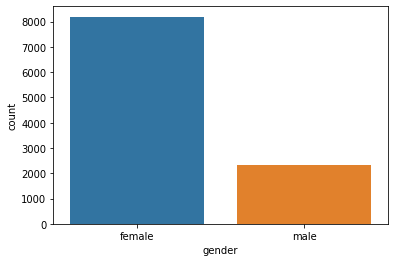

In [0]:
import seaborn as sns
ax = sns.countplot(x="gender", data=train)

In [0]:
train['startTime']=pd.to_datetime(train['startTime'])
train['endTime']=pd.to_datetime(train['endTime'])
test['startTime']=pd.to_datetime(test['startTime'])
test['endTime']=pd.to_datetime(test['endTime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   session_id   10500 non-null  object        
 1   startTime    10500 non-null  datetime64[ns]
 2   endTime      10500 non-null  datetime64[ns]
 3   ProductList  10500 non-null  object        
 4   gender       10500 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 410.3+ KB


In [0]:
train.head()

,session_id,startTime,endTime,ProductList,gender,Duration
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0


In [0]:
train['ProductList'][0]

'A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/'

In [0]:
import numpy as np
train['Duration(in hr)']=train['endTime']-train['startTime']

train['Duration(in hr)']=train['Duration(in hr)']/np.timedelta64(1,'m')
test['Duration(in hr)']=test['endTime']-test['startTime']

test['Duration(in hr)']=test['Duration(in hr)']/np.timedelta64(1,'m')

In [0]:
train['Duration(in hr)']=np.abs(train['Duration(in hr)'])
test['Duration(in hr)']=np.abs(test['Duration(in hr)'])

In [0]:
train.head()

,session_id,startTime,endTime,ProductList,gender,Duration(in hr)
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0


In [0]:
train['category']=train['ProductList'].apply(lambda x:x[0:6])
train['subcategory']=train['ProductList'].apply(lambda x:x[7:13])
train['subsubcategory']=train['ProductList'].apply(lambda x:x[14:20])
#train['ProductCode']=train['ProductList'].apply(lambda x:x[21:27])

In [0]:
train.head()

In [0]:
test['category']=test['ProductList'].apply(lambda x:x[0:6])
test['subcategory']=test['ProductList'].apply(lambda x:x[7:13])
test['subsubcategory']=test['ProductList'].apply(lambda x:x[14:20])
#test['ProductCode']=test['ProductList'].apply(lambda x:x[21:27])


In [0]:
len(test['ProductCode'].unique())

3890

In [0]:
train['Item#']=train.ProductList.map(lambda x: len(x.split(';')))
test['Item#']=test.ProductList.map(lambda x: len(x.split(';')))

In [0]:
train.groupby('gender').agg({'Item#':np.mean,'Duration(in hr)':np.mean})

,Item#,Duration(in hr)
gender,,
female,2.247314,823.253784
male,2.097487,1506.330156


In [0]:
train['ProductList'][0]

'A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/'

In [0]:
list1=[x.split(';')for x in train['ProductList']]
list1

[['A00002/B00003/C00006/D28435/',
  'A00002/B00003/C00006/D02554/',
  'A00002/B00003/C00006/D28436/',
  'A00002/B00003/C00006/D28437/'],
 ['A00001/B00009/C00031/D29404/',
  'A00001/B00009/C00031/D02617/',
  'A00001/B00009/C00031/D29407/',
  'A00001/B00009/C00031/D29410/',
  'A00001/B00009/C00031/D29411/',
  'A00001/B00009/C00031/D25444/',
  'A00001/B00009/C00031/D29418/'],
 ['A00002/B00001/C00020/D16944/'],
 ['A00002/B00004/C00018/D10284/',
  'A00002/B00004/C00018/D10285/',
  'A00002/B00004/C00018/D10286/'],
 ['A00001/B00001/C00012/D30805/', 'A00001/B00001/C00012/D30806/'],
 ['A00002/B00002/C00081/D25039/'],
 ['A00002/B00011/C00180/D18487/', 'A00002/B00011/C00114/D18459/'],
 ['A00002/B00001/C00059/D15254/',
  'A00002/B00001/C00059/D00900/',
  'A00002/B00002/C00002/D02063/'],
 ['A00002/B00001/C00010/D06129/'],
 ['A00002/B00001/C00010/D12841/', 'A00002/B00002/C00112/D20047/'],
 ['A00002/B00007/C00024/D02625/'],
 ['A00002/B00002/C00002/D22971/'],
 ['A00002/B00001/C00150/D35471/',
  'A0000

In [0]:
list11=[x.split(';')for x in test['ProductList']]
list11

In [0]:

#list2=[a[-7:-1] for x in list1 for a in x]
#list2=[[s.strip() for s in l] for l in list1]
list2=[[a[-7:-1] for a in sub ] for sub in list1]
list2

[['D28435', 'D02554', 'D28436', 'D28437'],
 ['D29404', 'D02617', 'D29407', 'D29410', 'D29411', 'D25444', 'D29418'],
 ['D16944'],
 ['D10284', 'D10285', 'D10286'],
 ['D30805', 'D30806'],
 ['D25039'],
 ['D18487', 'D18459'],
 ['D15254', 'D00900', 'D02063'],
 ['D06129'],
 ['D12841', 'D20047'],
 ['D02625'],
 ['D22971'],
 ['D35471', 'D33572', 'D35478', 'D02157', 'D03547', 'D35483'],
 ['D01652', 'D01867'],
 ['D21686', 'D02584'],
 ['D07771',
  'D07773',
  'D07774',
  'D07757',
  'D07759',
  'D07760',
  'D07761',
  'D07762',
  'D07763',
  'D07767',
  'D07768',
  'D05509',
  'D03961',
  'D07769'],
 ['D03342'],
 ['D11574', 'D11579'],
 ['D30808'],
 ['D10706', 'D11998'],
 ['D22322'],
 ['D27803'],
 ['D30329', 'D34372'],
 ['D03308'],
 ['D28653'],
 ['D25319', 'D15819', 'D25321'],
 ['D16015'],
 ['D31170'],
 ['D09455'],
 ['D00645'],
 ['D08575'],
 ['D33350', 'D33352', 'D33346', 'D33345', 'D33348'],
 ['D33595', 'D33596', 'D24164'],
 ['D15707'],
 ['D12742'],
 ['D30671'],
 ['D21690'],
 ['D18416'],
 ['D00685'

In [0]:
list3=[j for i in list2 for j in i]
list3=pd.Series(list3).drop_duplicates().tolist()
len(list3)

16503

In [0]:
list3

In [0]:
list22=[[a[-7:-1] for a in sub ] for sub in list11]
list22

In [0]:
list33=[j for i in list22 for j in i]
list33=pd.Series(list33).drop_duplicates().tolist()
len(list33)

8300

In [0]:
train['Product']=list2
train.head()

In [0]:
test['Product']=list22
test.head()

In [0]:
xx_m=[1 if bool(set(i).intersection(male_only))  else 0  for i in train['Product'] ]
len(xx_m)

10500

In [0]:
xx_mt=[1 if bool(set(i).intersection(male_only))  else 0  for i in test['Product'] ]
len(xx_mt)

4500

In [0]:
xx_f=[1 if bool(set(i).intersection(female_only))  else 0  for i in train['Product'] ]
len(xx_f)

10500

In [0]:
xx_ft=[1 if bool(set(i).intersection(female_only))  else 0  for i in test['Product'] ]
len(xx_ft)

4500

In [0]:
train['male_prod']=xx_m
train['female_prod']=xx_f

In [0]:
test['male_prod']=xx_mt
test['female_prod']=xx_ft

In [0]:
train.head()

,session_id,startTime,endTime,ProductList,gender,category,subcategory,subsubcategory,Product,male_prod,female_prod
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,A00002,B00003,C00006,"[D28435, D02554, D28436, D28437]",0,1
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,A00001,B00009,C00031,"[D29404, D02617, D29407, D29410, D29411, D2544...",1,0
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,A00002,B00001,C00020,[D16944],0,1
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,A00002,B00004,C00018,"[D10284, D10285, D10286]",0,1
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,A00001,B00001,C00012,"[D30805, D30806]",1,0


In [0]:
prod = train['Product'].apply(pd.Series)
prod = prod.rename(columns = lambda x : 'prod_' + str(x))
prod


,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_25,prod_26,prod_27,prod_28,prod_29,prod_30,prod_31,prod_32,prod_33,prod_34,prod_35
0,D28435,D02554,D28436,D28437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D29404,D02617,D29407,D29410,D29411,D25444,D29418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D16944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D10284,D10285,D10286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D30805,D30806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,D06407,D06409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10496,D11660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10497,D18028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10498,D09453,D09454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
prod_t = test['Product'].apply(pd.Series)
prod_t = prod_t.rename(columns = lambda x : 'prod_' + str(x))
prod_t


In [0]:
test1=pd.concat([test[:], prod_t[:]], axis=1)
test1.head()

,session_id,startTime,endTime,ProductList,Duration(in hr),category,subcategory,subsubcategory,Item#,Product,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20,prod_21,prod_22,prod_23,prod_24,prod_25,prod_26,prod_27,prod_28,prod_29,prod_30,prod_31,prod_32,prod_33,prod_34,prod_35,prod_36,prod_37,prod_38,prod_39,prod_40,prod_41,prod_42
0,u12112,2014-08-12 13:36:00,2014-08-12 13:36:00,A00002/B00003/C00006/D19956/,0.00,A00002,B00003,C00006,1,[D19956],D19956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u19725,2014-12-19 13:52:00,2014-12-19 13:52:00,A00002/B00005/C00067/D02026/,0.00,A00002,B00005,C00067,1,[D02026],D02026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u11795,2014-01-12 10:44:00,2014-01-12 10:44:00,A00002/B00002/C00004/D12538/,0.00,A00002,B00002,C00004,1,[D12538],D12538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u22639,2014-08-12 20:19:00,2014-08-12 20:22:00,A00002/B00003/C00079/D22781/;A00002/B00003/C00...,0.05,A00002,B00003,C00079,4,"[D22781, D22782, D19325, D22786]",D22781,D22782,D19325,D22786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u18034,2014-12-15 19:33:00,2014-12-15 19:33:00,A00002/B00001/C00010/D23419/,0.00,A00002,B00001,C00010,1,[D23419],D23419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
train1=pd.concat([train[:], prod[:]], axis=1)
train1.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'Duration(in hr)', 'category', 'subcategory', 'subsubcategory', 'Item#',
       'Product', 'prod_0', 'prod_1', 'prod_2', 'prod_3', 'prod_4', 'prod_5',
       'prod_6', 'prod_7', 'prod_8', 'prod_9', 'prod_10', 'prod_11', 'prod_12',
       'prod_13', 'prod_14', 'prod_15', 'prod_16', 'prod_17', 'prod_18',
       'prod_19', 'prod_20', 'prod_21', 'prod_22', 'prod_23', 'prod_24',
       'prod_25', 'prod_26', 'prod_27', 'prod_28', 'prod_29', 'prod_30',
       'prod_31', 'prod_32', 'prod_33', 'prod_34', 'prod_35'],
      dtype='object')

In [0]:
train.head()

In [0]:
test1.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'Duration(in hr)',
       'category', 'subcategory', 'subsubcategory', 'Item#', 'Product',
       'prod_0', 'prod_1', 'prod_2', 'prod_3', 'prod_4', 'prod_5', 'prod_6',
       'prod_7', 'prod_8', 'prod_9', 'prod_10', 'prod_11', 'prod_12',
       'prod_13', 'prod_14', 'prod_15', 'prod_16', 'prod_17', 'prod_18',
       'prod_19', 'prod_20', 'prod_21', 'prod_22', 'prod_23', 'prod_24',
       'prod_25', 'prod_26', 'prod_27', 'prod_28', 'prod_29', 'prod_30',
       'prod_31', 'prod_32', 'prod_33', 'prod_34', 'prod_35', 'prod_36',
       'prod_37', 'prod_38', 'prod_39', 'prod_40', 'prod_41', 'prod_42'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = pd.DataFrame(train[['category', 'subcategory','subsubcategory']].apply(le.fit_transform))
dft_cat=pd.DataFrame(test[['category', 'subcategory','subsubcategory',]].apply(le.fit_transform))

In [0]:
train.head()

,session_id,startTime,endTime,ProductList,gender,Duration(in hr),category,subcategory,subsubcategory,Item#
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1.0,A00002,B00003,C00006,4
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,6.0,A00001,B00009,C00031,7
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,0.0,A00002,B00001,C00020,1
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3.0,A00002,B00004,C00018,3
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2.0,A00001,B00001,C00012,2


In [0]:
train['gender'] = train['gender'].map( {'male':1, 'female':0} )

In [0]:
Y=train['gender'].values

In [0]:
Y

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
train_cat=train1.drop(columns=['session_id', 'startTime', 'endTime', 'ProductList','category','subcategory','subsubcategory','gender','Product'],axis=1)
test_cat=test1.drop(columns=['session_id', 'startTime', 'endTime', 'ProductList','category','subcategory','subsubcategory','Product'],axis=1)


In [0]:
train1.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'category', 'subcategory', 'subsubcategory', 'Product', 'male_prod',
       'female_prod', 'prod_0', 'prod_1', 'prod_2', 'prod_3', 'prod_4',
       'prod_5', 'prod_6', 'prod_7', 'prod_8', 'prod_9', 'prod_10', 'prod_11',
       'prod_12', 'prod_13', 'prod_14', 'prod_15', 'prod_16', 'prod_17',
       'prod_18', 'prod_19', 'prod_20', 'prod_21', 'prod_22', 'prod_23',
       'prod_24', 'prod_25', 'prod_26', 'prod_27', 'prod_28', 'prod_29',
       'prod_30', 'prod_31', 'prod_32', 'prod_33', 'prod_34', 'prod_35'],
      dtype='object')

In [0]:
train_df = pd.concat([train,df_cat], axis=1, sort=False)
test_df=pd.concat([test,dft_cat], axis=1, sort=False)
print(train_df.shape)
print(test_df.shape)

(10500, 13)
(4500, 12)


In [0]:
train_df.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'category', 'subcategory', 'subsubcategory', 'Product', 'male_prod',
       'female_prod', 'prod_0', 'prod_1', 'prod_2', 'prod_3', 'prod_4',
       'prod_5', 'prod_6', 'prod_7', 'prod_8', 'prod_9', 'prod_10', 'prod_11',
       'prod_12', 'prod_13', 'prod_14', 'prod_15', 'prod_16', 'prod_17',
       'prod_18', 'prod_19', 'prod_20', 'prod_21', 'prod_22', 'prod_23',
       'prod_24', 'prod_25', 'prod_26', 'prod_27', 'prod_28', 'prod_29',
       'prod_30', 'prod_31', 'prod_32', 'prod_33', 'prod_34', 'prod_35',
       'category', 'subcategory', 'subsubcategory'],
      dtype='object')

In [0]:
test_df.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'category',
       'subcategory', 'subsubcategory', 'Product', 'male_prod', 'female_prod',
       'prod_0', 'prod_1', 'prod_2', 'prod_3', 'prod_4', 'prod_5', 'prod_6',
       'prod_7', 'prod_8', 'prod_9', 'prod_10', 'prod_11', 'prod_12',
       'prod_13', 'prod_14', 'prod_15', 'prod_16', 'prod_17', 'prod_18',
       'prod_19', 'prod_20', 'prod_21', 'prod_22', 'prod_23', 'prod_24',
       'prod_25', 'prod_26', 'prod_27', 'prod_28', 'prod_29', 'prod_30',
       'prod_31', 'prod_32', 'prod_33', 'prod_34', 'prod_35', 'prod_36',
       'prod_37', 'prod_38', 'prod_39', 'prod_40', 'prod_41', 'prod_42',
       'category', 'subcategory', 'subsubcategory'],
      dtype='object')

In [0]:
columns_add = ['prod_36','prod_37', 'prod_38', 'prod_39', 'prod_40', 'prod_41', 'prod_42']
for newcol in columns_add:
    train_df[newcol]=0

In [0]:
train_df.fillna(0,inplace=True)
test_df.fillna(0,inplace=True)


In [0]:
test_df.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'Duration(in hr)',
       'category', 'subcategory', 'subsubcategory', 'Item#', 'Product',
       'male_prod', 'female_prod', 'prod_0', 'prod_1', 'prod_2', 'prod_3',
       'prod_4', 'prod_5', 'prod_6', 'prod_7', 'prod_8', 'prod_9', 'prod_10',
       'prod_11', 'prod_12', 'prod_13', 'prod_14', 'prod_15', 'prod_16',
       'prod_17', 'prod_18', 'prod_19', 'prod_20', 'prod_21', 'prod_22',
       'prod_23', 'prod_24', 'prod_25', 'prod_26', 'prod_27', 'prod_28',
       'prod_29', 'prod_30', 'prod_31', 'prod_32', 'prod_33', 'prod_34',
       'prod_35', 'prod_36', 'prod_37', 'prod_38', 'prod_39', 'prod_40',
       'prod_41', 'prod_42', 'category', 'subcategory', 'subsubcategory'],
      dtype='object')

In [0]:
train_df['AvgTime']=train_df['Item#']/train_df['Duration(in hr)']
test_df['AvgTime']=test_df['Item#']/test_df['Duration(in hr)']

In [0]:
train_df.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'Duration(in hr)', 'category', 'subcategory', 'subsubcategory', 'Item#',
       'category', 'subcategory', 'subsubcategory', 'AvgTime'],
      dtype='object')

In [0]:
train_df1=train_df.drop(columns=['session_id', 'startTime', 'endTime', 'ProductList', 'gender','Item#',
        'Duration(in hr)'],axis=1)
train_df1=train_df1.iloc[:,3:]
test_df1=test_df.drop(columns=['session_id', 'startTime', 'endTime', 'ProductList','Item#','Duration(in hr)'],axis=1)
test_df1=test_df1.iloc[:,3:]

In [0]:
train_df1=train_df1.replace(np.inf, 0)
test_df1=test_df1.replace(np.inf,0)

In [0]:
train_df1 = train_df1[['prod_0', 'prod_1', 'prod_2', 'prod_3',
       'prod_4', 'prod_5', 'prod_6', 'prod_7', 'prod_8', 'prod_9', 'prod_10',
       'prod_11', 'prod_12', 'prod_13', 'prod_14', 'prod_15', 'prod_16',
       'prod_17', 'prod_18', 'prod_19', 'prod_20', 'prod_21', 'prod_22',
       'prod_23', 'prod_24', 'prod_25', 'prod_26', 'prod_27', 'prod_28',
       'prod_29', 'prod_30', 'prod_31', 'prod_32', 'prod_33', 'prod_34',
       'prod_35', 'prod_36', 'prod_37', 'prod_38', 'prod_39', 'prod_40',
       'prod_41', 'prod_42', 'category', 'subcategory', 'subsubcategory',
       'AvgTime']]

In [0]:
!pip install catboost

In [0]:
import hyperopt
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

In [0]:
RANDOM_STATE = 0



In [0]:
cols=['prod_0', 'prod_1', 'prod_2', 'prod_3', 'prod_4', 'prod_5', 'prod_6',
       'prod_7', 'prod_8', 'prod_9', 'prod_10', 'prod_11', 'prod_12',
       'prod_13', 'prod_14', 'prod_15', 'prod_16', 'prod_17', 'prod_18',
       'prod_19', 'prod_20', 'prod_21', 'prod_22', 'prod_23', 'prod_24',
       'prod_25', 'prod_26', 'prod_27', 'prod_28', 'prod_29', 'prod_30',
       'prod_31', 'prod_32', 'prod_33', 'prod_34', 'prod_35', 'prod_36',
       'prod_37', 'prod_38', 'prod_39', 'prod_40', 'prod_41', 'prod_42']
cate_features_index=[train_df1.columns.get_loc(c) for c in cols if c in train_df]
#cate_features_index

In [0]:
Y

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(train_df1,Y,train_size=.75,random_state=1234)

In [0]:
model_cat = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,iterations=1000,od_type='IncToDec',od_pval=0.01,od_wait=70,depth=6,	l2_leaf_reg=7)

In [0]:
model_cat.fit(xtrain,ytrain,eval_set=(xtest,ytest))

0:	learn: 0.8660317	test: 0.8613333	best: 0.8613333 (0)	total: 5.03ms	remaining: 5.02s
1:	learn: 0.8671746	test: 0.8620952	best: 0.8620952 (1)	total: 9.63ms	remaining: 4.81s
2:	learn: 0.8660317	test: 0.8613333	best: 0.8620952 (1)	total: 14ms	remaining: 4.64s
3:	learn: 0.8659048	test: 0.8609524	best: 0.8620952 (1)	total: 18.3ms	remaining: 4.57s
4:	learn: 0.8659048	test: 0.8609524	best: 0.8620952 (1)	total: 22.8ms	remaining: 4.53s
5:	learn: 0.8659048	test: 0.8609524	best: 0.8620952 (1)	total: 27.2ms	remaining: 4.5s
6:	learn: 0.8659048	test: 0.8609524	best: 0.8620952 (1)	total: 31.6ms	remaining: 4.49s
7:	learn: 0.8659048	test: 0.8609524	best: 0.8620952 (1)	total: 35.9ms	remaining: 4.45s
8:	learn: 0.8657778	test: 0.8609524	best: 0.8620952 (1)	total: 40.3ms	remaining: 4.43s
9:	learn: 0.8657778	test: 0.8609524	best: 0.8620952 (1)	total: 44.6ms	remaining: 4.42s
10:	learn: 0.8657778	test: 0.8609524	best: 0.8620952 (1)	total: 49.1ms	remaining: 4.42s
11:	learn: 0.8657778	test: 0.8613333	best: 0.

In [0]:
pred_cat= model_cat.predict(test_df1)
pred_cat

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
feat=pd.DataFrame({'Features':train_df1.columns,'importance':model_cat.feature_importances_})
feat

,Features,importance
0,prod_0,12.468065
1,prod_1,6.336104
2,prod_2,2.423058
3,prod_3,1.304109
4,prod_4,0.306690
5,prod_5,0.546442
6,prod_6,0.222084
7,prod_7,0.208577
8,prod_8,0.274009
9,prod_9,0.164339


In [0]:
import pickle
filename = 'cat_model.sav'
pickle.dump(model_cat, open(filename, 'wb'))

In [0]:
!ls

'AAAtTmwhL5OhbB8Wixrqhu-za?dl=0'   sample_submission_opxHi4g.csv
 catboost_info			   test_Yix80N0.csv
 cat_model.sav			   train_8wry4cB.csv
 sample_data


In [0]:
submit['preds']=pred_cat
submit['gender']=submit['preds'].apply(lambda x: 'male' if x==1 else 'female')
submit.drop(columns=['preds'],axis=1,inplace=True)

In [0]:
submit.to_csv("Submit19.csv", index=False)
from google.colab import files
files.download('Submit19.csv')

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
test = sc_X.fit_transform(test_df1)
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
n_split = 10
kf = KFold(n_splits=n_split, random_state=42, shuffle=True)
target = Y   
y_valid_pred = 0 * target
y_test_pred = 0


for train_index, valid_index in kf.split(train_df1):
   y_train, y_valid = target[train_index], target[valid_index]
   X_train, X_valid = train[train_index], train[valid_index]
   X_train = sc_X.transform(X_train)
   X_valid = sc_X.transform(X_valid)
         
            
   print( "\nFold ", idx)
            
            #for catboost
          
   model_cat.fit(X_train,y_train,eval_set=(X_valid,y_valid),use_best_model=True,verbose=500)
          
        
   y_pred=model_cat.predict(X_valid)
        
            # Making the Confusion Matrix
   cm = confusion_matrix(y_valid, y_pred)
   print("cm=%s" %cm)
        
            #accuracy_score
   score=accuracy_score(y_valid,y_pred)
   print("score=%.4g"%score)
            #roc_score
   roc=roc_auc_score(y_valid,model_cat.predict_proba(X_valid)[:,1])
   print("roc=%.4g"%roc)
            #classification_report
   cr=classification_report(y_valid,y_pred)
   print("cr=%s"%cr)
        
   y_test_pred +=model_cat.predict_proba(test)[:,1]
            
        
    
y_test_pred=y_test_pred/n_split

KeyError: ignored

In [0]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return [('gini', gini_score)]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
K = 10
kf = KFold(n_splits = K, random_state = 3228, shuffle = True)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_xg = pd.DataFrame(train[['category', 'subcategory','subsubcategory']].apply(le.fit_transform))
dft_xg=pd.DataFrame(test[['category', 'subcategory','subsubcategory',]].apply(le.fit_transform))

In [0]:
df_xg.columns

Index(['category', 'subcategory', 'subsubcategory'], dtype='object')

In [0]:
train['gender'] = train['gender'].map( {'male':1, 'female':0} )
Y=train['gender'].values

In [0]:
train.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'category', 'subcategory', 'subsubcategory'],
      dtype='object')

In [0]:
import numpy as np
train_df1 = np.array(df_xg)
test_df1 = np.array(dft_xg)
target_train=Y
xgb_preds = []

In [0]:
target_train

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
for train_index, test_index in kf.split(train_df1):
    train_X, valid_X = train_df1[train_index], train_df1[test_index]
    train_y, valid_y = target_train[train_index], target_train[test_index]

    xgb_params = {'eta': 0.1, 'max_depth': 7, 'subsample': 0.9, 'colsample_bytree': 0.9, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 99, 'silent': True,'scale_pos_weight':1}

    d_train = xgb.DMatrix(train_X, train_y)
    d_valid = xgb.DMatrix(valid_X, valid_y)
    d_test = xgb.DMatrix(test_df1)
    
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    model = xgb.train(xgb_params, d_train, 800,  watchlist, feval=gini_xgb, maximize=True, verbose_eval=50, early_stopping_rounds=60)
                    
    xgb_pred = model.predict(d_test)
    xgb_preds.append(list(xgb_pred))



[0]	train-auc:0.81111	valid-auc:0.815043	train-gini:0.621988	valid-gini:0.62274
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 60 rounds.
[50]	train-auc:0.842794	valid-auc:0.839118	train-gini:0.685392	valid-gini:0.677107
[100]	train-auc:0.849577	valid-auc:0.843906	train-gini:0.698961	valid-gini:0.686683
[150]	train-auc:0.852582	valid-auc:0.843813	train-gini:0.704969	valid-gini:0.686497
[200]	train-auc:0.854669	valid-auc:0.846047	train-gini:0.709143	valid-gini:0.690965
[250]	train-auc:0.855543	valid-auc:0.845459	train-gini:0.710891	valid-gini:0.689788
[300]	train-auc:0.856115	valid-auc:0.847048	train-gini:0.712036	valid-gini:0.692966
[350]	train-auc:0.856638	valid-auc:0.849251	train-gini:0.713082	valid-gini:0.697372
Stopping. Best iteration:
[311]	train-auc:0.85628	valid-auc:0.849251	train-gini:0.712366	valid-gini:0.697372

[0]	train-auc:0.811681	valid-auc:0.812887	train-gini:0.623216	valid-gini:0.617

In [0]:
preds=[]
for i in range(len(xgb_preds[0])):
    sum=0
    for j in range(K):
        sum+=xgb_preds[j][i]
    preds.append(sum / K) 

In [0]:
preds

[0.08011568635702133,
 0.10178291015326976,
 0.10493767634034157,
 0.2514862880110741,
 0.1243218094110489,
 0.45290436446666715,
 0.867801308631897,
 0.45290436446666715,
 0.13846860378980635,
 0.6710403442382813,
 0.1243218094110489,
 0.03923691716045141,
 0.6163716018199921,
 0.1243218094110489,
 0.1479271210730076,
 0.053834243305027486,
 0.21370498538017274,
 0.12508339583873748,
 0.12508339583873748,
 0.0943839780986309,
 0.1243218094110489,
 0.07828756049275398,
 0.06931960061192513,
 0.1243218094110489,
 0.13846860378980635,
 0.0691974900662899,
 0.0691974900662899,
 0.07129465639591218,
 0.07365505695343018,
 0.5110853105783463,
 0.45290436446666715,
 0.06931960061192513,
 0.0691974900662899,
 0.07828756049275398,
 0.22720210254192352,
 0.6485536575317383,
 0.6445561051368713,
 0.03923691716045141,
 0.15545978844165803,
 0.0943839780986309,
 0.1824369877576828,
 0.9533303439617157,
 0.2514862880110741,
 0.07129465639591218,
 0.08343160077929497,
 0.2514862880110741,
 0.0943839

In [0]:
preds_xg=[1 if x>=.60 else 0 for x in preds]
preds_xg

In [0]:
preds[0:10]

[0.08011568635702133,
 0.10178291015326976,
 0.10493767634034157,
 0.2514862880110741,
 0.1243218094110489,
 0.45290436446666715,
 0.867801308631897,
 0.45290436446666715,
 0.13846860378980635,
 0.6710403442382813]

In [0]:
submit['preds']=preds
submit['gender']=submit['preds'].apply(lambda x: 'male' if x> .60 else 'female')
submit.drop(columns=['preds'],axis=1,inplace=True)


In [0]:
submit.to_csv("Submit7.csv".format(K), index=False)
from google.colab import files
files.download('Submit7.csv')

In [0]:
train_df1=train_df.drop(columns=['Duration(in hr)','Item#'],axis=1)
test_df1=test_df.drop(columns=['Duration(in hr)','Item#'],axis=1)

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
col_names=df_xg.columns
df_mm1 = mm_scaler.fit_transform(df_xg)

df_mm1 = pd.DataFrame(df_mm1, columns=col_names)
df_mm2 = mm_scaler.fit_transform(dft_xg)

df_mm2= pd.DataFrame(df_mm2, columns=col_names)

In [0]:
df_mm1.head()

,category,subcategory,subsubcategory
0,0.1,0.024691,0.015198
1,0.0,0.098765,0.091185
2,0.1,0.000000,0.057751
3,0.1,0.037037,0.051672
4,0.0,0.000000,0.033435


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_mm1,Y,test_size=0.3, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 40, max_depth=7, criterion = 'entropy',bootstrap=True)

In [0]:
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rclf.feature_importances_

array([0.58758984, 0.16731256, 0.2450976 ])

In [0]:
feat=pd.DataFrame({'Feature_name':df_xg.columns,'Feature_importance':rclf.feature_importances_})
feat

,Feature_name,Feature_importance
0,category,0.587590
1,subcategory,0.167313
2,subsubcategory,0.245098


In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = rclf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

3150
0.8752380952380953
0.582723279648609
[[2359  108]
 [ 285  398]]


In [0]:
pred_rf = rclf.predict_proba(df_mm2)[1]
pred_rf

array([0.87025243, 0.12974757])

In [0]:
submit['preds']=pred_rf
submit['gender']=submit['preds'].apply(lambda x: 'male' if x==1 else 'female')
submit.drop(columns=['preds'],axis=1,inplace=True)

In [0]:
submit['gender'].unique()

array(['female', 'male'], dtype=object)

In [0]:
submit.to_csv("Submit11.csv".format(K), index=False)
from google.colab import files
files.download('Submit11.csv')

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


#fit decision tree classifier
model_nn = MLPClassifier(hidden_layer_sizes=2, max_iter=2000)
model_nn.fit(X_train, y_train)

#predict 'y' for test data
y_data_pred_test = model_nn.predict(X_test)

#score
print('Accuracy: ', accuracy_score(y_test, y_data_pred_test))
print('confusion matrix:', confusion_matrix(y_test, y_data_pred_test))
print('F1:', f1_score(y_test, y_data_pred_test))

Accuracy:  0.8698412698412699
confusion matrix: [[2367  100]
 [ 310  373]]
F1: 0.6453287197231834


In [0]:
pred_nn=model_nn.predict(df_mm2)
pred_nn

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
submit['preds']=pred_nn
submit['gender']=submit['preds'].apply(lambda x: 'male' if x==1 else 'female')
submit.drop(columns=['preds'],axis=1,inplace=True)

In [0]:
submit.to_csv("Submit12.csv".format(K), index=False)
from google.colab import files
files.download('Submit12.csv')

In [0]:
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import AdaBoostClassifier

In [0]:
ada = AdaBoostClassifier(base_estimator=rclf, n_estimators=50,
                         learning_rate=0.5, random_state=42)

In [0]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [0]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    

In [0]:
print_score(ada, X_train, y_train, X_test, y_test, train=True)
print_score(ada, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8770

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      5725
           1       0.78      0.61      0.69      1625

    accuracy                           0.88      7350
   macro avg       0.84      0.78      0.81      7350
weighted avg       0.87      0.88      0.87      7350


Confusion Matrix: 
 [[5452  273]
 [ 631  994]]

Average Accuracy: 	 0.8660
Accuracy SD: 		 0.0104
Test Result:

accuracy score: 0.8724

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2467
           1       0.77      0.59      0.67       683

    accuracy                           0.87      3150
   macro avg       0.83      0.77      0.79      3150
weighted avg       0.87      0.87      0.87      3150


Confusion Matrix: 
 [[2344  123]
 [ 279  404]]



In [0]:
bag_clf = BaggingClassifier(base_estimator=ada, n_estimators=50,
                            max_samples=1.0, max_features=1.0, bootstrap=True,
                            bootstrap_features=False, n_jobs=-1,
                            random_state=42)

In [0]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                    base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                          ccp_alpha=0.0,
                                                                                          class_weight=None,
                                                                                          criterion='entropy',
                                                                                          max_depth=7,
                                                                                          max_features='auto',
                                                                                          max_leaf_nodes=None,
                                                                                          max_samples=None,
                                                               

In [0]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

In [0]:
pred_bg=bag_clf.predict(df_mm2)
pred_bg

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
submit['preds']=pred_bg
submit['gender']=submit['preds'].apply(lambda x: 'male' if x==1 else 'female')
submit.drop(columns=['preds'],axis=1,inplace=True)

In [0]:
submit.to_csv("Submit15.csv", index=False)
from google.colab import files
files.download('Submit15.csv')